In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [69]:
df= pd.read_csv('exchange_rate.csv',header=0,index_col=0,parse_dates=True)

In [70]:
df

,Ex_rate
date,
1990-01-01,0.785500
1990-02-01,0.781800
1990-03-01,0.786700
1990-04-01,0.786000
1990-05-01,0.784900
...,...
2010-06-10,0.718494
2010-07-10,0.721839
2010-08-10,0.723197


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7588 entries, 01-01-1990 00:00 to 10-10-2010 00:00
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ex_rate  7588 non-null   float64
dtypes: float64(1)
memory usage: 118.6+ KB


In [5]:
import seaborn as sns

<Axes: >

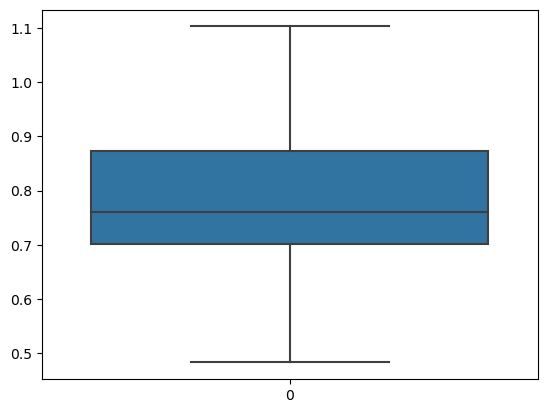

In [6]:
sns.boxplot(df['Ex_rate'])

C:\Users\Yakub Shaik\AppData\Local\Temp\ipykernel_236\2078830496.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Ex_rate'])


<Axes: xlabel='Ex_rate', ylabel='Density'>

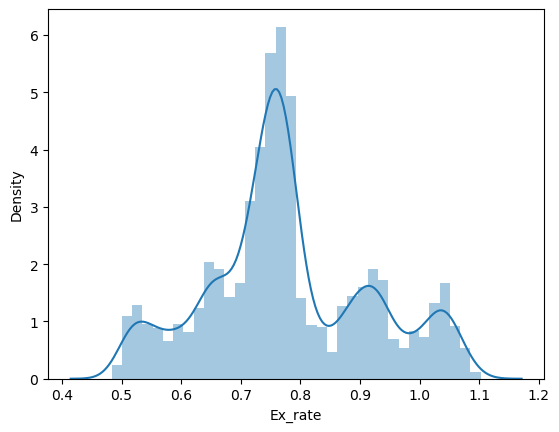

In [7]:
sns.distplot(df['Ex_rate'])

<Axes: xlabel='Ex_rate', ylabel='Count'>

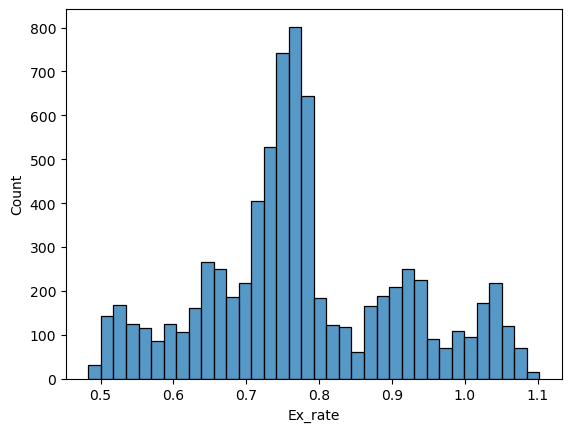

In [8]:
sns.histplot(df['Ex_rate'])

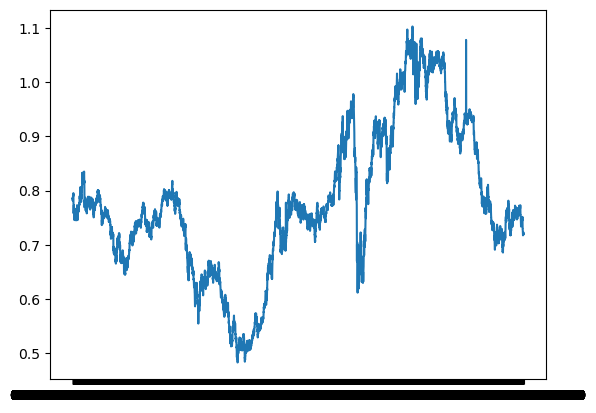

In [9]:
plt.plot(df)

In [22]:
from matplotlib import pyplot
from pandas.plotting import lag_plot

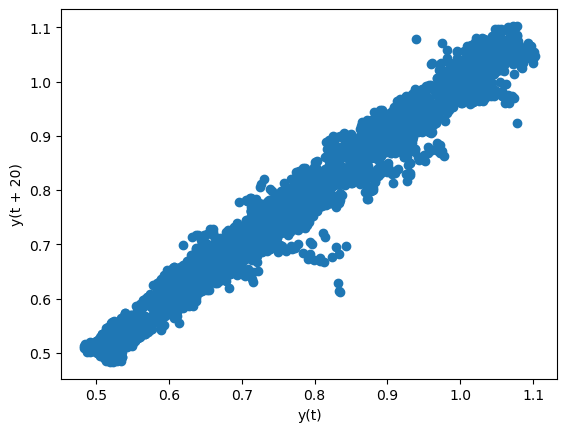

In [23]:
lag_plot(df,lag=20)
pyplot.show()

In [26]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

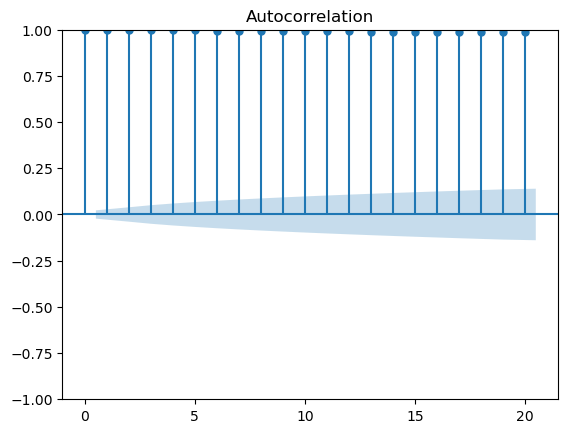

In [27]:
plot_acf(df,lags=20)
pyplot.show()

In [28]:
train=df.head(6000)
test=df.tail(1588)

<Axes: xlabel='date'>

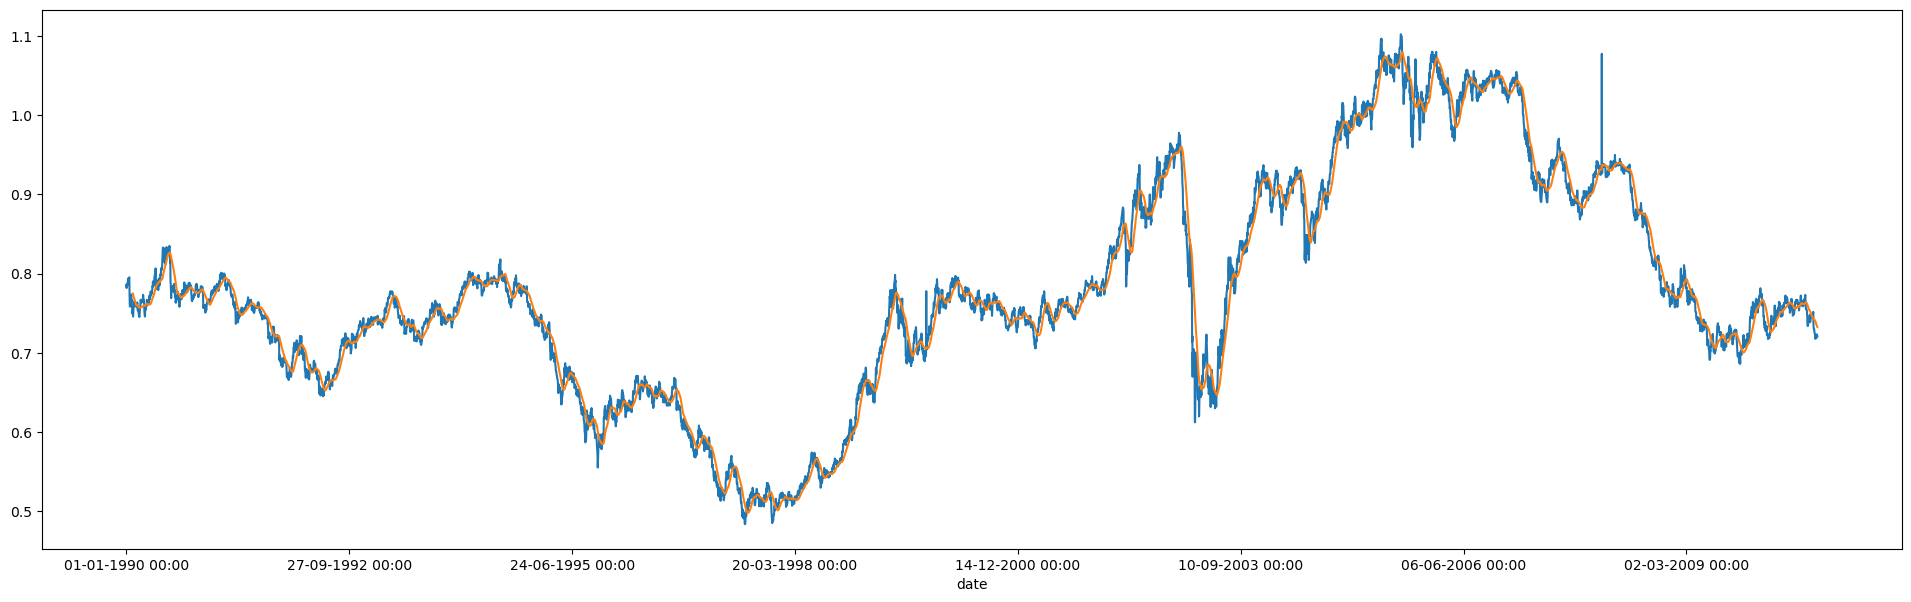

In [34]:
plt.figure(figsize=(24,7))
df.Ex_rate.plot(label='df')

pred=pd.DataFrame()
pred['moving_avg']=df['Ex_rate'].rolling(30).mean()
pred['moving_avg'].plot(label=str(10))

In [37]:
def MAPE(pred,org):
    df=np.abs((pred-org)/org)*100
    return np.mean(df)

In [38]:
test

,Ex_rate
date,
06-06-2006 00:00,1.037990
07-06-2006 00:00,1.037947
08-06-2006 00:00,1.026694
09-06-2006 00:00,1.022735
10-06-2006 00:00,1.031800
...,...
06-10-2010 00:00,0.718494
07-10-2010 00:00,0.721839
08-10-2010 00:00,0.723197


In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose 

In [42]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [60]:
model=SimpleExpSmoothing(df)

C:\Users\Yakub Shaik\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Yakub Shaik\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [62]:
fit=model.fit(smoothing_level=0.2,optimized=False)

In [63]:
df['smoothed']=fit.fittedvalues

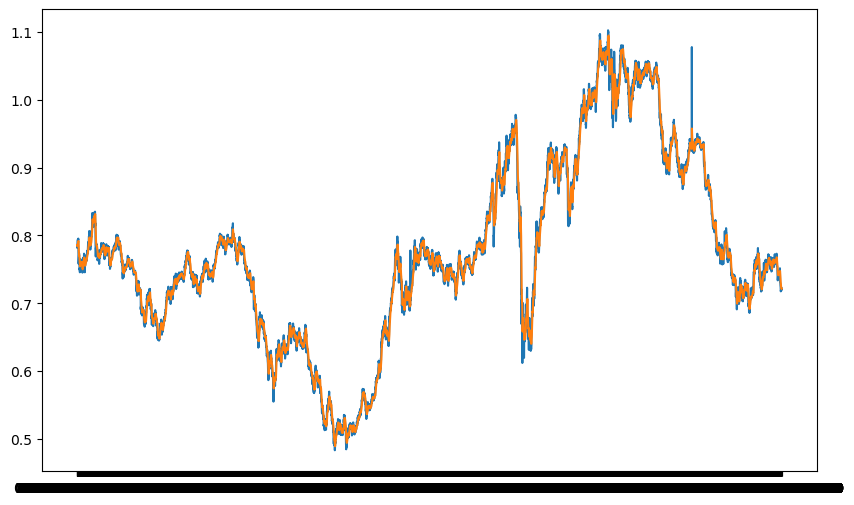

In [64]:
plt.figure(figsize=(10,6))
plt.plot(df['Ex_rate'])
plt.plot(df['smoothed'])